# Bin Packing Lab

- Authors:
  - Jung Woo Lee, lee331@mcmaster.ca
  - Nicholas Fabugais-Inaba, fabugain@mcmaster.ca
- Group ID on Avenue: 56
- Gitlab URL: https://gitlab.cas.mcmaster.ca/lee331/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [2]:
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [3]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [7]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[14, 13, 13, 12, 8, 8], [20, 19, 18, 17, 15], [37, 30, 23], [39, 37], [43, 40], [44, 43], [50, 44], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [ ]:
# strategy: Online = online.NextFit()
# result = strategy(reader.online())
# print(f'nb_bins = {len(result)}')
# print(f'{sorted(result)}')

strategy: Online = online.FirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 31
[[61, 13, 20], [62, 23, 15], [69, 8, 18], [83, 17], [97], [61, 37], [88, 8], [44, 43, 13], [72, 14, 12], [66, 30], [79, 19], [97], [83], [62, 37], [100], [70], [40, 44], [50, 43], [67], [63], [76], [97], [51, 39], [93], [93], [92], [76], [75], [71], [99], [92]]


In [5]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 33
[[61, 13], [62, 23], [69, 8], [83], [97], [61, 20], [88], [44, 43], [72], [66, 15], [79], [97], [83], [62, 37], [100], [70, 12], [40, 8, 18, 13], [44, 50], [67, 14], [63, 17], [37, 43], [76], [97], [51, 30], [93], [39, 19], [93], [92], [76], [75], [71], [99], [92]]


As expected, the online version is worst!

## T1

SOLID ANALYSIS:

Single responsibility

Definition: Each class, function, or object is only responsible for one specific task. 

Enforcement: 
The code follows single responsibility as certain groups of tasks are delegated to their own classes and functions. Taking for example, the task of loading data is put into the reader classes in reader.py. Another example is how the business logic (i.e. the algorithms) are put into their own classes. The online and offline algorithms are further separated as their tasks are slightly different due to the nature of their inputs, and thus each algorithm has their own respective classes. There is no “super-function” that can complete all tasks through the use of conditional, the code is separated such that each section can handle their subset of inputs. Overall, by delegating specific tasks to specific classes, instead of all the tasks into a few large classes, the code follows single responsibility.


Open closed

Definition: The Open Closed principles states that an app or program is open for extension but closed for modification. 

Enforcement: 
The code follows this principle as it utilizes abstraction, which allows for easy future implementations. Taking for example, model.py, its classes Online and Offline are both abstract and they have abstract methods called _process(). _process() is left to be implemented by other classes, for its particular type of problem (online or offline bin-packing). If another offline algorithm is wished to be implemented, there is no change of existing code needed, a new class that implements _process() from the abstract Offline class is sufficient. The same applies for the abstract Online class, and DatasetReader; these abstract classes can be implemented by new classes in the future if wanted. Thus, the existing code need not be changed to add new functionality, making it open for extension and closed for modification.


Liskov’s Substitution Principle:

Definition:
Every subclass or derived class should be substitutable for their base or parent class.

Enforcement:
The code follows this principle as each of the abstract classes can be substituted for their subclasses. In model.py, the abstract classes both are expecting an output of type Solution for both of their _process() methods. In any call of the abstract classes, they can be substituted with one of their concretions. For example, if somewhere an Online object was created and _process() called for that object, we would be able to replace this with a NextFit_On object and its _process() call. There would be no resulting errors that occur. This applies for the Offline abstract class and its concretions, and the DatasetReader class with its concretion. 


Interface Segregation Principle

Definition: Whenever you have an interface, you need everything that implements that interface to all methods/parts of that interface (i.e., everything tracks back to one interface). 

Enforcement:
The code follows this principle as none of the concrete classes are required to implement unnecessary functions of what they are implementing. The NextFit classes only implement _process() from their abstract classes, and that is all that they require. BinppReader only implements _load_data_from_disk(), but does not need to implement online() or offline(), which would have been unnecessary for it to implement. 


Design for Interface 

Definition: Entities must depend on abstractions, not on concretions. It states that the high-level module must not depend on the low-level module, but they should depend on abstractions.

Enforcement: All classes in the code depend only on abstract classes, and no abstract class depends on a concrete class within the code, thus this principle is satisfied by the code.


DATASET ANALYSIS:

The BinPP dataset has parameters n, wj, and c. n is the number of items i.e. (the weights), wj refers to the possible weights each item can be (with j = 1, …, n), and c is the capacity of each bin. 

For BPP-1 Data Set 1, each of the parameters are given a domain of possible values. The name of each data file follows the format NxCyWz_v.BPP. x, y, and z are integer values beginning from 1, and they map to n, c, and wj respectively. In dataset 1, n has possible values 50, 100, 200, 500, and if x = 1 in the filename, then n = 50 for that data file. The capacities work similarly as the number of items. wj has possible ranges as its values, and thus. In dataset 1, if z = 1, wj = [1, 100]. 

Each data file has the first row as the value of n, the second row as the value of c, and all the subsequent rows being the item weights. 

This structure to the dataset is useful for algorithms as we can easily classify different types of data. For example, we are able to easily characterize portions of the data as having large numbers of items, others as having large capacities, and others as having a combination. This makes evaluating algorithms based on certain KPIs much more evident for analyzing. By testing the different bin packing algorithms on different classes of data, one can interpret the results as one algorithm being more efficient with large item weights and low capacity, or large number of items and large capacity, et cetera. Identifying the advantages and disadvantages of each algorithm is thus much easier to measure.

The Jburkardt dataset is quite similar. Where there would be one data file for BinPP, there are two (plus one for the optimal solution) for Jburkardt, and it follows its own naming convention. One file contains the capacity value, while its corresponding weight file contains the item weights. This has the same benefits for algorithms as the BinPP dataset as stated above. 


## T2

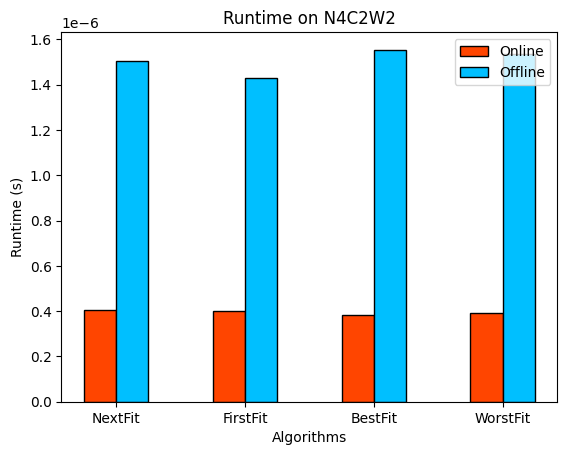

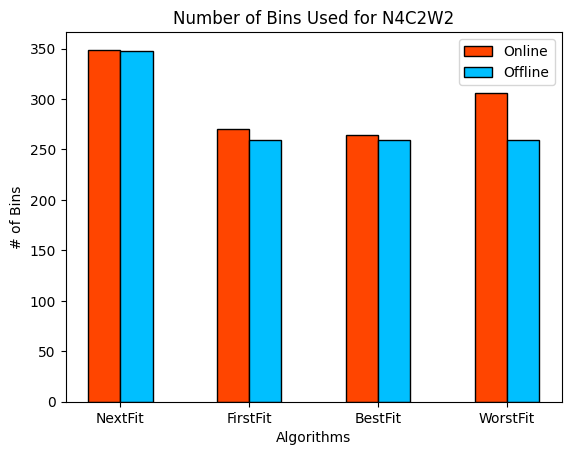

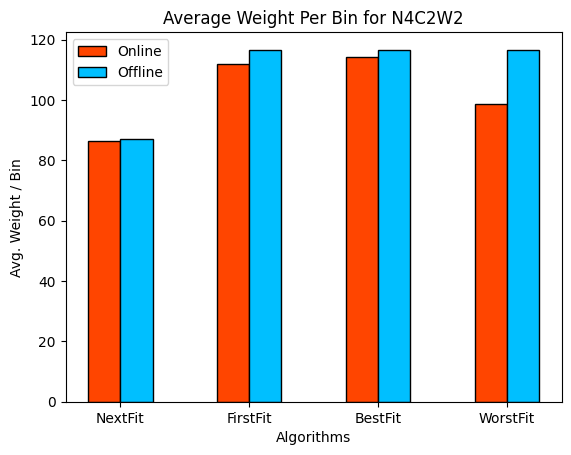

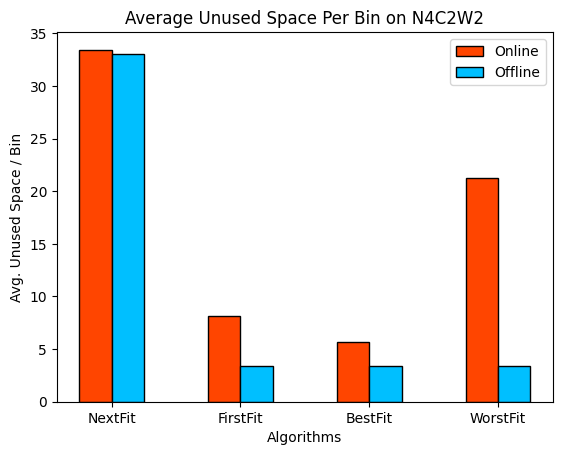

In [1]:
import graph

filename = 'out/plot_data.json'
plot_data = graph.GetData.load_json_data(filename)
x_axis = 'Algorithms'

plot_data1 = graph.GetData.extract_json_data(plot_data, 'Time')
plot_data1 = graph.GetData.average_data(plot_data1)
plot_data2 = graph.GetData.extract_json_data(plot_data, 'Bins Used')
plot_data2 = graph.GetData.average_data(plot_data2)
plot_data3 = graph.GetData.extract_json_data(plot_data, 'Average Weight Per Bin')
plot_data3 = graph.GetData.average_data(plot_data3)
plot_data4 = graph.GetData.extract_json_data(plot_data, 'Average Unused Space Per Bin')
plot_data4 = graph.GetData.average_data(plot_data4)

graph.PlotGraph.plot_benchmark(plot_data1, 'Runtime on N4C2W2', 'Runtime (s)', x_axis)
graph.PlotGraph.plot_benchmark(plot_data2, 'Number of Bins Used for N4C2W2', '# of Bins', x_axis)
graph.PlotGraph.plot_benchmark(plot_data3, 'Average Weight Per Bin for N4C2W2', 'medium. Weight / Bin', x_axis)
graph.PlotGraph.plot_benchmark(plot_data4, 'Average Unused Space Per Bin on N4C2W2', 'Medium. Unused Space / Bin', x_axis)

Analysis:

The benchmarking was done on the dataset N4C2W2 for all algorithms. It is essential that all the algorithms are tested on the same dataset as we want fixed frame of reference to gauge certain attributes. The key performance indices we chose are runtime, number of bins used, average weight per bin, and average unused space per bin (unused space meaning unused carrying capacity). Runtime is obviously important, as we wish to measure which algorithms will produce a solution the fastest. The number of bins used is important due to the context of the problem being that of minimizing the number of bins used to carry the items. The average weight per bin and average unused space per bin are inverses of each other, and they measure how tightly the bins were able to be packed. This could be seen as a measure of efficiency.

In terms of runtime, there is a great difference between online and offline algorithms. Online algorithms provide a faster runtime than their offline counterparts, for all algorithms, but both types still run quickly. There are marignal differences in runtime between algorithms however, and thus the deciding factor on runtimes is whether the algorithm is online or offline. 

The number of bins used provides an interesting insight on how the algorithms operate. The online algorithms seem to be worse at minimizing the number of bins used for all the algorithms compared to their offline versions. This makes sense as the offline versions have all of the items to put in, at hand, whereas the online algorithms do not choose which item to put in next. The offline algorithms are then able to sort their items before packing them in to the bins and are thus better at packing, but this sorting results in a longer runtime than the online algorithms. 

The average weight per bin and the average unused space per bin are, as stated before, inverses of each other. Firstly, it can be seen how the online algorithms are worse at packing items tightly into the bins, as there are lower average weights per bin, and higher average unused space per bin. Again, this is due to the online algorithms not being to have all of the items initially, and must pack the incoming items in whatever order they are given.

There are some interesting points to be made on the Next Fit algorithms and the online Worst Fit algorithm. The Next Fit algorithms are very poor at minimizing the number of bins used, and packing the items tightly, in contrast to all the other algorithms. This is due to the trivial nature of the Next Fit algorithm, as it only focuses on one bin at a time, and does not look at any other bins. The online Worst Fit algorithm is quite peculiar as its offline version is on par with the offline Best Fit and First Fit algorithms. It has significantly worse efficiency in minimizing bins and packing the bins tightly, but it is still much better than the Next Fit algorithms. 

Overall, it seems that the best algorithms out of the ones implemented are the online and offline Best Fit, First Fit, and offline Worst Fit algorithms. These algorithms minimize the number of bins used, and pack the items tightly. The online algorithms are able to run faster than their offline counterparts, however, their performance in terms of the other indices is poorer.

## T3



Dataset: _datasets/binpp/N1C1W2/N1C1W2_B.BPP.txt
Optimal Solution: 30



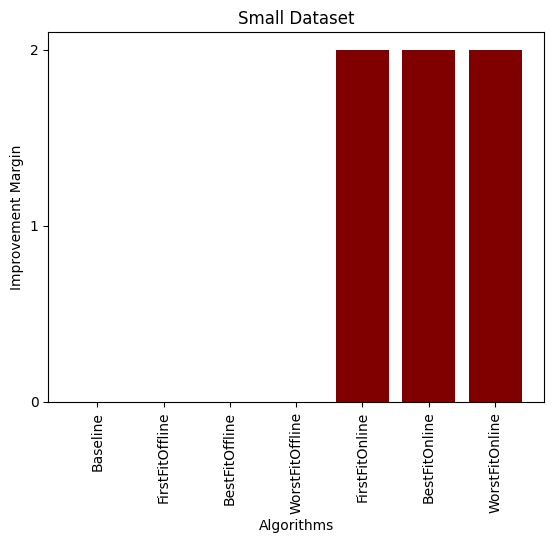

Dataset: _datasets/binpp/N2C2W2/N2C2W2_B.BPP.txt
Optimal Solution: 56



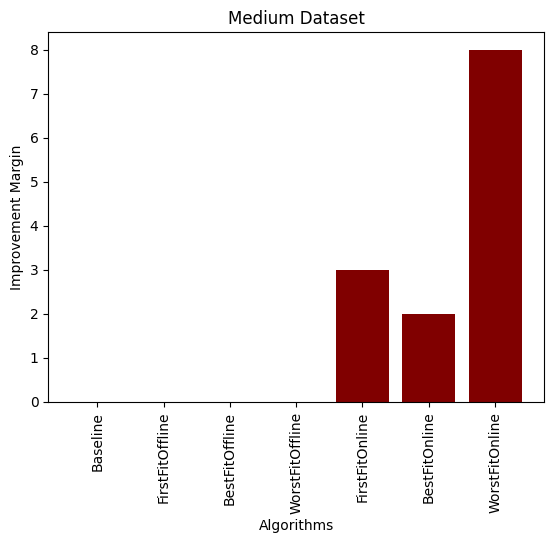

Dataset: _datasets/binpp/N4C3W2/N4C3W2_B.BPP.txt
Optimal Solution: 203



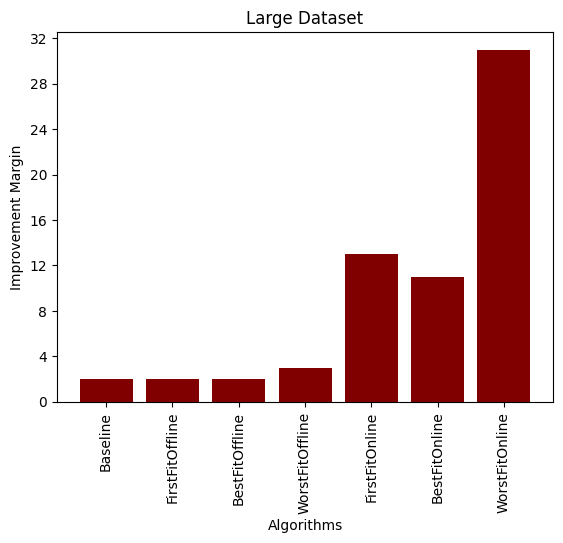

Dataset: _datasets/binpp-hard/HARD5.BPP.txt
Optimal Solution: 56



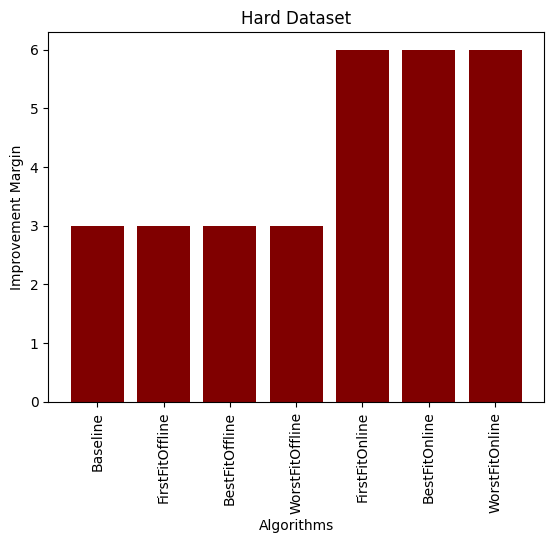

Dataset: _datasets/binpp/N4C1W2/N4C1W2_B.BPP.txt
Optimal Solution: 328



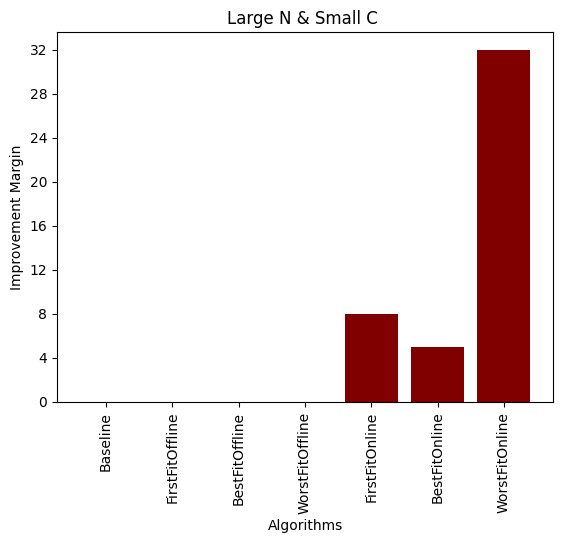

Dataset: _datasets/binpp/N1C3W2/N1C3W2_B.BPP.txt
Optimal Solution: 20



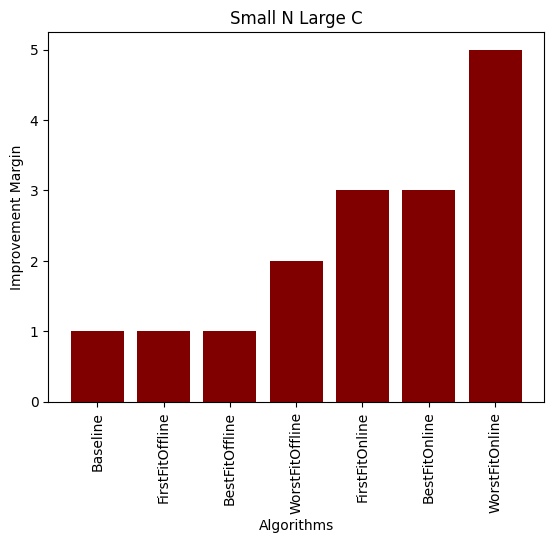

Dataset: _datasets/binpp/N3C3W1/N3C3W1_B.BPP.txt
Optimal Solution: 71



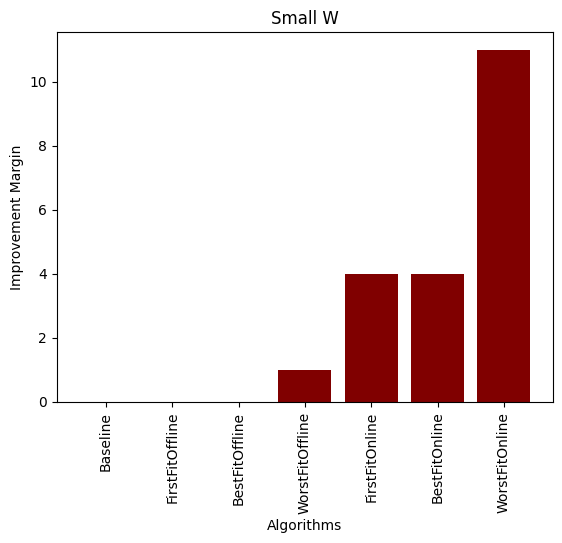

Dataset: _datasets/binpp/N3C3W4/N3C3W4_B.BPP.txt
Optimal Solution: 88



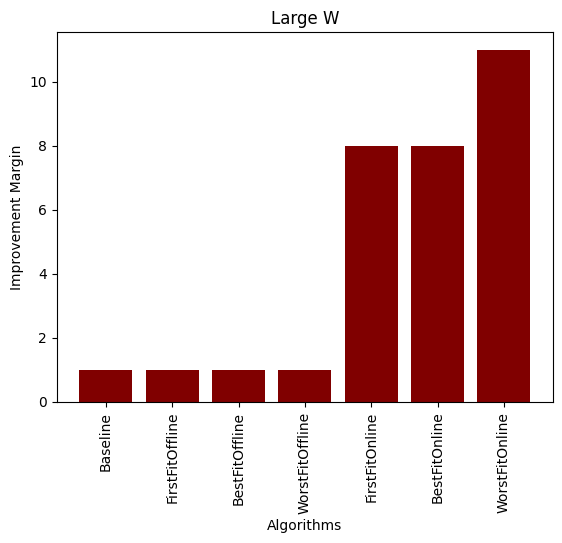

In [1]:
from macpacking.reader import DatasetReader, BinppReader, OracleReader
from macpacking.model  import Online, Offline
from matplotlib.ticker import MaxNLocator
import macpacking.algorithms.offline as offline
import macpacking.algorithms.online as online
import macpacking.algorithms.baseline as baseline
import matplotlib.pyplot as plt

# We consider:
#   - 50 objects (N1)
#   - bin capacity of 100 (C1)
#   - and weight in the [8,100] interval (W1)
dataset_small = '_datasets/binpp/N1C1W2/N1C1W2_B.BPP.txt'
# We consider:
#   - 100 objects (N2)
#   - bin capacity of 120 (C2)
#   - and weight in the [20,99] interval (W2)
dataset_medium = '_datasets/binpp/N2C2W2/N2C2W2_B.BPP.txt'
# We consider:
#   - 500 objects (N4)
#   - bin capacity of 150 (C3)
#   - and weight in the [30,100] interval (W4)
dataset_large = '_datasets/binpp/N4C3W2/N4C3W2_B.BPP.txt'
# We consider:
#   - 200 objects
#   - bin capacity of 100000
#   - and weight in the [20000,34955] interval
dataset_hard = '_datasets/binpp-hard/HARD5.BPP.txt'
# We consider:
#   - 500 objects (N4)
#   - bin capacity of 100 (C1)
#   - and weight in the [30,100] interval (W4)
dataset_smallC_largeN = '_datasets/binpp/N4C1W2/N4C1W2_B.BPP.txt'
# We consider:
#   - 50 objects (N1)
#   - bin capacity of 150 (C3)
#   - and weight in the [2,95] interval (W1)
dataset_smallN_largeC = '_datasets/binpp/N1C3W2/N1C3W2_B.BPP.txt'
dataset_smallW = '_datasets/binpp/N3C3W1/N3C3W1_B.BPP.txt'
dataset_largeW = '_datasets/binpp/N3C3W4/N3C3W4_B.BPP.txt'

oracle_dataset = '_datasets/oracle.csv'
cases = [dataset_small, dataset_medium, dataset_large, dataset_hard, dataset_smallC_largeN, dataset_smallN_largeC, dataset_smallW, dataset_largeW]
titles = ['Small Dataset', 'Medium Dataset', 'Large Dataset', 'Hard Dataset', 'Large N & Small C ', 'Small N Large C', 'Small W', 'Large W']
algorithms = []

for dataset in cases:

    optimal_solution = OracleReader(dataset)
    improvement_margin = []

    reader: DatasetReader = BinppReader(dataset)
    print(f'Dataset: {dataset}')
    print(f'Optimal Solution: {optimal_solution._load_data(oracle_dataset)}\n')

    strategy: Offline = baseline.BenMaier()
    result = strategy(reader.offline())
    if 'Baseline' not in algorithms:
        algorithms.append('Baseline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Offline = offline.FirstFitDecreasing()
    result = strategy(reader.offline())
    if 'FirstFitOffline' not in algorithms:
        algorithms.append('FirstFitOffline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Offline = offline.BestFitDecreasing()
    result = strategy(reader.offline())
    if 'BestFitOffline' not in algorithms:
        algorithms.append('BestFitOffline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Offline = offline.WorstFitDecreasing()
    result = strategy(reader.offline())
    if 'WorstFitOffline' not in algorithms:
        algorithms.append('WorstFitOffline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Online = online.FirstFit()
    result = strategy(reader.online())
    if 'FirstFitOnline' not in algorithms:
        algorithms.append('FirstFitOnline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Online = online.BestFit()
    result = strategy(reader.online())
    if 'BestFitOnline' not in algorithms:
        algorithms.append('BestFitOnline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    strategy: Online = online.WorstFit()
    result = strategy(reader.online())
    if 'WorstFitOnline' not in algorithms:
        algorithms.append('WorstFitOnline')
    improvement_margin.append(len(result) - optimal_solution._load_data(oracle_dataset))

    # X and Y Axis
    xAxis = [algo for algo in algorithms]
    yAxis = [val for val in improvement_margin]

    # Bar graph
    fig = plt.figure().gca()
    plt.bar(xAxis,yAxis, color='maroon')
    plt.xlabel('Algorithms')
    plt.ylabel('Improvement Margin')
    plt.xticks(rotation=90)
    plt.title(titles[cases.index(dataset)])
    fig.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()


Let N refer to the number of items, let C refer to the capacity, let W refer to the minimum weight value.
N: small = 50, medium = (50-500), large = 500
C: small = 100, medium = (100-150), hard = 150
W: small = 1, large = 30


The entire dataset structure was categorized into eight different classes. The classes are: small N and small C, medium N and medium C, large N and large C, hard, large N and small C, small N and large C, small W, and large W. All of the cases except for the last two have the same W value to keep it as an invariant, and conversely, the last two cases have invariant N and C values. An exception to all of these is the hard case, which has a medium N value, very large C and very large W.

An overall view of all the cases shows that online algorithms have larger margins of improvement than the offline algorithms. These margins become more pronounced as the number of items increases, and thus for every case with a high N value, it becomes problematic for the online algorithms. This is due to how online algorithms operate, as stated in the T2 analysis, online algorithms must insert items into bins as they come, and cannot change the order beforehand. This creates less desirable instances of packing the items. 

The small N and large C case shows how capacity has little effect towards the minimization of bins. In contrast, the large N and small C case displays how problematic having a very large amount of items is. The margins of error for all algorithms is becomes much worse than other cases. In the large N and large C case, this can be seen as well, but if looking at that case in isolation, it cannot be told which parameter causes the rise in the margin. 

The small W and large W cases offer a look at how the minimum weights of items plays a role in minimizing bins. The large W case shows a slight increase in the margin for improvement, an indication that a higher W value can result in a worse result of bin packing. This makes sense, as the items become larger on average, the harder it is to fit them into bins, as these larger items may not fit in contrast to smaller items, and would require a new bin for packing. Although the margin seems to increase only slightly from small W to large W, we suspect that this is due to the difference between small and large not being great. We also suspect that small capacities would fare worse with larger W values. 

Lastly, the hard case has a very large C and W, but a medium N value. As can be seen, the margins of improvement are still on par with the medium case. This again shows how the N value holds greater weight in determining the margins of improvement.

In conclusion, in analyzing these cases, it was found that as the number of items increases, the margins of improvement increases, and the cases which have large numbers of items to pack are the problematic cases. The margin of improvement becomes unacceptable for the online algorithms as the issue of their operation compounds more as the number of items increases as it results in more chances of undesirable placements of items.

## T4

## T5

ANSWERS

## BONUS TASK

ANSWERS

## Self-reflection questions

Nicholas Fabugais-Inaba

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)

The process that I went through to produce this result was dissecting each of the problems into two parts: the implementation and the benchmarking, while splitting up the work for the analysis. By separating these two parts for each process, as a team we were able to have one person focus on the implementation aspect and one person focus on the benchmarking. This would allow things to run smoothly as each of us would become more comfortable in our designated field. Moreover, in between we would still support each other, if the other person needed assistance with what we were working on. This allowed us to accomplish a lot more work given the alotted time we had. With this I focused more on the implementation side of things, provided an extensive amount of research dedicated to determining each algorithms steps that were needed for its implementation. If I had any trouble, I would briefly discuss the problem with my teammate and see if he could figure out how one would go about doing it as I would then write the code. This process of going through things was very efficient as for future work, I will definitely try and split up the work in a way to where each part compliments each other.

  - What were your standards for this piece of work? Did you meet your standards? (Inward)

My standards for this piece of work was to make sure we would be able to get everything working as intended. Referring back to the previous lab, we had a lot of trouble in even meeting this standard, however, there was a lot more focus and drive to accomplishing the entire lab as one complete product. Although this seems to be a low standard, I believe that improvement is extremely crucial and to be able to hand in a complete product is not only fulfilling, but definitely satisfying as my teammate and I have put a lot of time and effort into accomplishing our piece of work. Next steps for future work would be to not only meet the given criteria as well as implement what has been asked for, but to also think of ways in which code can be even more optimized, follow SOLID design principles more extensively, and organize data and algorithms in a more readable and concise manner.

  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
One thing I want people to particularly notice when they look at my work is the amount of time and effort that was given to accomplish the given task. Of course appreciation is shown towards outputting a product in a certain way, however, sometimes I feel as though not enough consideration is taken to really grasp the work students put in to what they do. Myself and I am assuming many others feel the same way as we may have put in an abundance of effort and time to completing a task in a certain way, however, at times, not a lot of information could have been provided, directions could have been vague or unclear, or not enough support could have been given to help understand certain parts of the problem. Individually I expect myself to improve, however, I hope as time moves forward that the people taking a look at my work are constantly trying to find ways to improve how they view work and how they can provide more clear comments pertaining to errors in the work or ways to improve the work that has been delivered, so I can learn from my mistakes to do better in the future.

  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

Lessons I will keep from this in my professional practice are to always abide by the SOLID design principles. This is not only useful in constructing code in a way that is readable and maintainable, however, it helps to make future code more extendable as an efficient base code can be extremely helpful when it is required for an additional method to be introduced. Another lesson would be the separation of concerns regarding a workload and how work should be grouped into categories that can then be solved in these specified portions. This would be very useful in professional practice as one might be given a very large task that they would not know where to even begin. However, by separating the workload into specific portions that correspond to each other, an individual may find it a lot more easy to understand how the problem would be solved.

Jung Woo Lee

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)

ANSWER

  - What were your standards for this piece of work? Did you meet your standards? (Inward)

ANSWER

  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  
ANSWER

  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

ANSWER